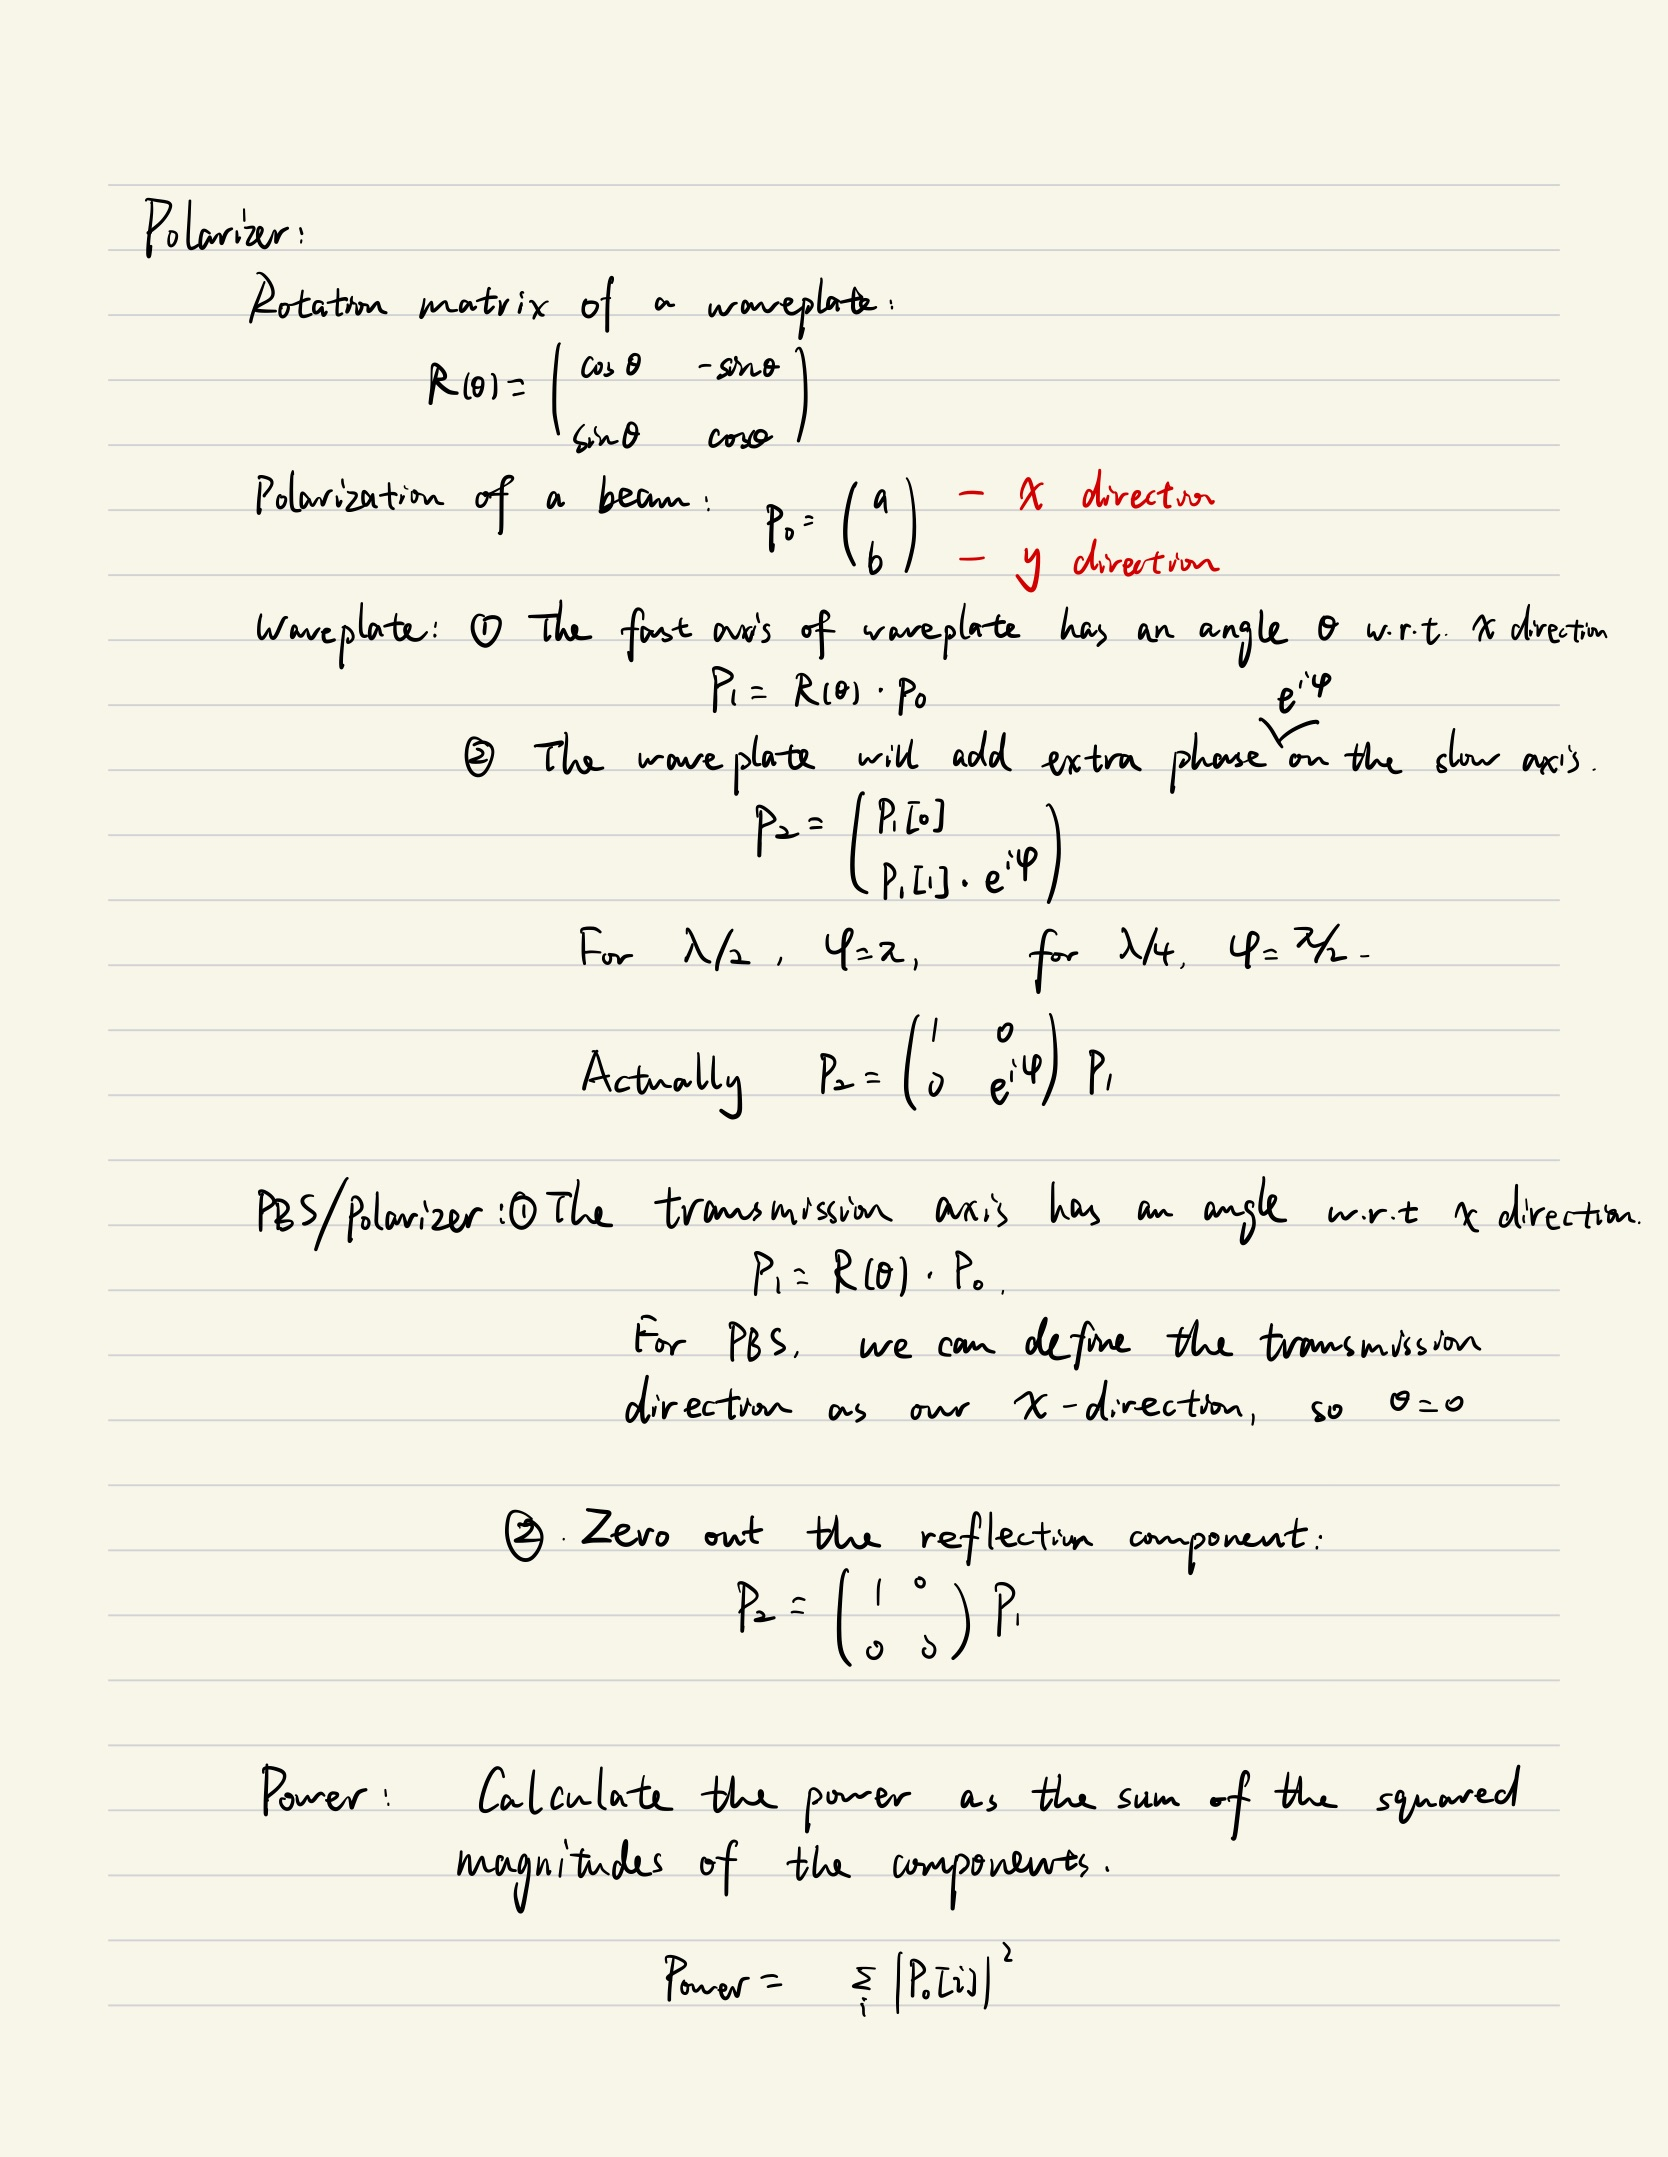

In [14]:
from IPython.display import Image

# Provide the path to the image file
Image(filename='Polarization.jpg')

In [24]:
import numpy as np
import matplotlib.pyplot as plt


def rotate_pol(p0, theta):
    # Calculate sin and cos of theta
    s, c = np.sin(theta), np.cos(theta)
    # Create the rotation matrix and apply it to p0
    rotation_matrix = np.array([[c, -s], [s, c]])
    return np.dot(rotation_matrix, p0)

def waveplate(p0, ax, phi):
    # Rotate the polarization by -ax
    p1 = rotate_pol(p0, -ax)
    # Apply waveplate transformation (multiply second component by e^(i phi))
    p2 = np.array([p1[0], p1[1] * np.exp(1j * phi)])
    # Rotate back by ax
    return rotate_pol(p2, ax)

def pbs(p0, ax):
    # Rotate the polarization by -ax
    p1 = rotate_pol(p0, -ax)
    # Apply PBS transformation (zero out second component)
    p2 = np.array([p1[0], 0])
    # Rotate back by ax
    return rotate_pol(p2, ax)

def power(p0):
    # Calculate the power as the sum of the squared magnitudes of the components
    return np.sum(np.abs(p0)**2)

Text(0.5, 1.0, 'Power vs. Angle')

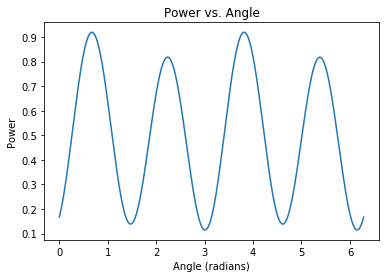

In [31]:
# Set up the axis range for plotting
ax = np.linspace(0, 2*np.pi, 10001)

# Initialize the polarization vector as a complex number array
# p0 = np.array([1 + 0.3j, 1j + 0.3j])
p0 = np.array([1, 1+2j])

# Compute the power for each angle in ax

powers = np.array([power(pbs(waveplate(p0, a, 0.95*np.pi), 0))/power(p0) for a in ax]) 

# Plot the results
plt.plot(ax, powers)
plt.xlabel('Angle (radians)')
plt.ylabel('Power')
plt.title('Power vs. Angle')
# plt.show()